In [46]:
import numpy as np
import matplotlib.pyplot as plt

import importlib
import epsilon_greedy as eg
importlib.reload(eg);

### Assignment 2: Epsilon-greedy algorithm

Explore with a probability $\epsilon > 0$.

- K arms

- T total time steps

- $\epsilon$ exploration fraction; probability of exploration

- Reward for each arm is given by Bernoulli distribution.

Assume that we played every arm once before starting the algorithm, so that we have a well-defined sample average for each arm to start with.

### Question 1

Show that with $\epsilon = 0$, the algorithm suffers linear regret, i.e. $R_T \ge c \cdot T$ for some constant $c>0$.

$\epsilon = 0$ means that the coin is always tail, i.e. we never explore but only exploit each time.

Delta: 0.27186643554769596


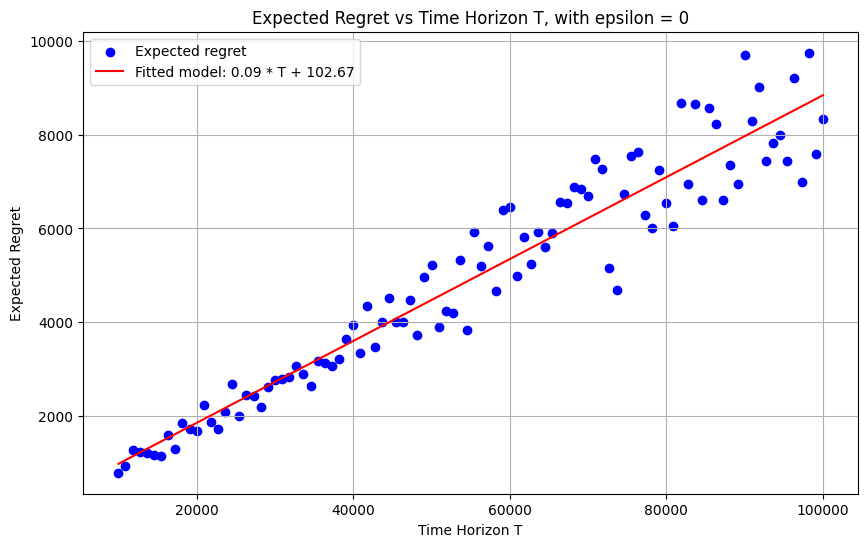

In [ ]:
# This code block runs for ~40s.

importlib.reload(eg);

K = 5
T_values = np.linspace(10000, 100000, num=100, dtype=int)
mu = np.random.rand(K)  # Random means for each arm

# If the Delta is too small (eg. < 0.2), the regret gets noisy.
print('Delta:', np.max(mu) - np.sort(mu)[-2])

# Compute average regrets for each T.
avg_regrets = []
for T in T_values:
    reg = eg.average_regret(K, T, mu, epsilon=0, method=0, num_runs=200)
    avg_regrets.append(reg)
avg_regrets = np.array(avg_regrets)

# Interpolation
# We expect regret ~ O(T), so we fit a line: avg_regret = a * T + b
coeffs = np.polyfit(T_values, avg_regrets, 1)
a, b = coeffs
fitted_regrets = a * T_values + b

plt.figure(figsize=(10, 6))
plt.scatter(T_values, avg_regrets, color='blue', label="Expected regret")
plt.plot(T_values, fitted_regrets, color='red', label=f"Fitted model: {a:.2f} * T + {b:.2f}")
plt.xlabel("Time Horizon T")
plt.ylabel("Expected Regret")
plt.title("Expected Regret vs Time Horizon T, with epsilon = 0")
plt.grid(True)
plt.legend()
plt.show()

Let's see in case of $\epsilon >0$. We expect to still see the linear regret.

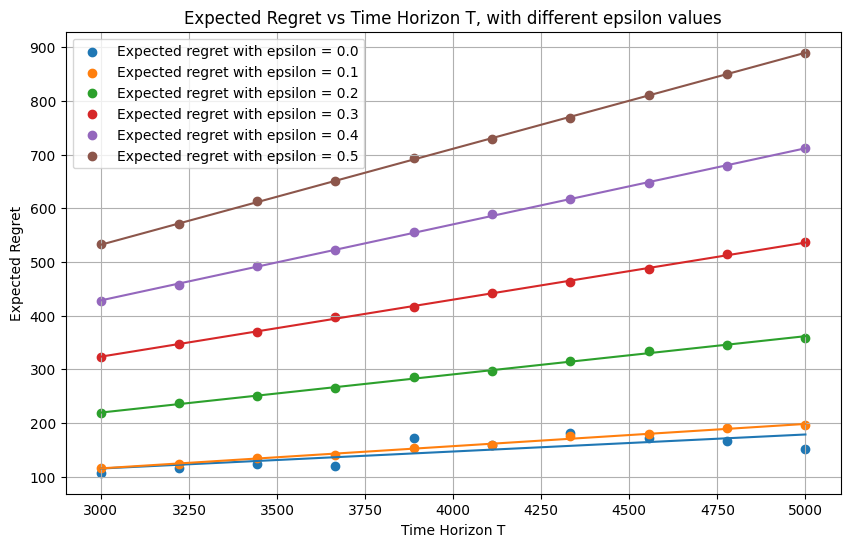

In [168]:
importlib.reload(eg);

K = 5
T_values = np.linspace(3000, 5000, num=10, dtype=int)
mu = np.random.rand(K)  # Random means for each arm

epsilon_values = [i/10 for i in range(0,6,1)]

# Compute average regrets for each T.
avg_regrets = {}
fitted_regrets = {}

plt.figure(figsize=(10, 6))

for epsilon in epsilon_values:
    avg_regrets[epsilon] = []

    for T in T_values:
        reg = eg.average_regret(K, T, mu, epsilon=epsilon, method=0, num_runs=100)
        avg_regrets[epsilon].append(reg)
    avg_regrets[epsilon] = np.array(avg_regrets[epsilon])

    # Interpolation
    # We expect regret ~ O(T), so we fit a line: avg_regret = a * T + b
    coeffs = np.polyfit(T_values, avg_regrets[epsilon], 1)
    a, b = coeffs
    fitted_regrets[epsilon] = a * T_values + b

    plt.scatter(T_values, avg_regrets[epsilon], label=f"Expected regret with epsilon = {epsilon}")
    plt.plot(T_values, fitted_regrets[epsilon])
    
plt.xlabel("Time Horizon T")
plt.ylabel("Expected Regret")
plt.title("Expected Regret vs Time Horizon T, with different epsilon values")
plt.grid(True)
plt.legend()
plt.show()

Indeed, we see linear regrets for constant $\epsilon >0$. We can also see that:

- with the largest $\epsilon$, we have the highest regrets, which makes sense since we are exploring more than necessary so that we are missing the chance to earn money by exploiting.

- with $K=5$ and $T=3000$, $\epsilon = 0$ and $\epsilon = 0.1$ compete to have the smallest regrets (run the code above multiple times to see this). Since with $\epsilon = 0$, we are not exploring at all, it at first won't seem to make sense that it yields the smallest regrets; this means that after the warmup round, where we pull all arms once, the arm with the largest sample average is indeed the optimal arm. This is indeed possible since we are simulating 100 times and taking the average of the regrets.

Now, instead of a constant $\epsilon$, consider a decaying exploration schedule, $\epsilon_t = 1/t$, as a function of time step. Setting a decaying exploration schedule makes sense since over time steps, the necessity of exploration decays. In this way, we expect to have sublinear regrets in $T$.

This is a part from Assignment 3.

Delta: 0.11731668222562797


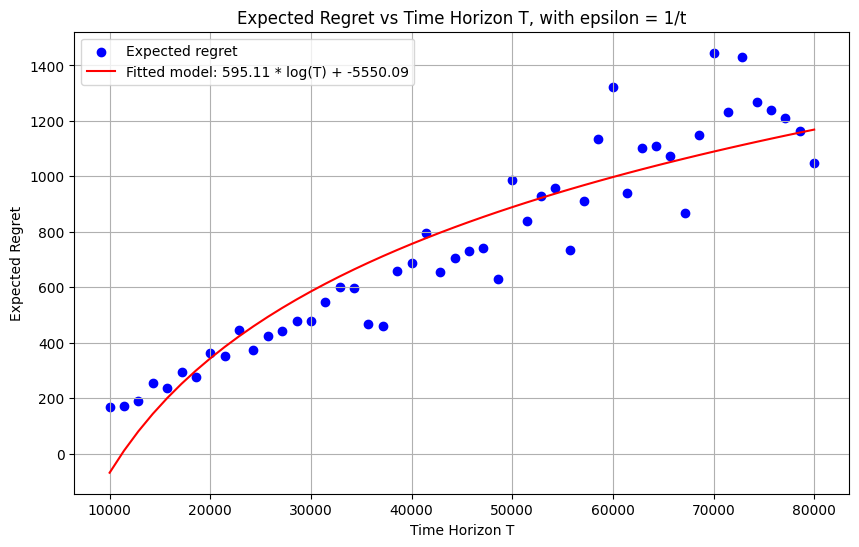

In [ ]:
# This code block runs for ~1min.

importlib.reload(eg);

K = 5
T_values = np.linspace(10000, 80000, num=50, dtype=int)
mu = np.random.rand(K)  # Random means for each arm

# If the Delta is small (eg. < 0.2), the regrets get noisy.
print('Delta:', np.max(mu) - np.sort(mu)[-2])

# Compute average regrets for each T, with epsilon = 1/t.
avg_regrets = []
for T in T_values:
    reg = eg.average_regret(K, T, mu, epsilon=0, method=1, num_runs=500)
    avg_regrets.append(reg)
avg_regrets = np.array(avg_regrets)

# Interpolation
# We expect regret ~ O(log(T)), so we fit a line: avg_regret = a * logT + b
logT = np.log(T_values)
coeffs = np.polyfit(logT, avg_regrets, 1)
a, b = coeffs
fitted_regrets = a * logT + b

plt.figure(figsize=(10, 6))
plt.scatter(T_values, avg_regrets, color='blue', label="Expected regret")
plt.plot(T_values, fitted_regrets, color='red', label=f"Fitted model: {a:.2f} * log(T) + {b:.2f}")
plt.xlabel("Time Horizon T")
plt.ylabel("Expected Regret")
plt.title("Expected Regret vs Time Horizon T, with epsilon = 1/t")
plt.grid(True)
plt.legend()
plt.show()

I have tried many values for $K$ and $T$ to show the sublinearity, but I couldn't make it. I guess $\epsilon_t = 1/t$ isn't enought to yield the sublinearity. In assignment 3, we can compare different functions for $\epsilon_t$, and there we might be able to find $\epsilon_t$ that yields better sublinearity.